<a href="https://colab.research.google.com/github/arnoob16/GodlyBars/blob/master/Eminem_RAP_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/My Drive/Data/songdata.csv')

# Word_based model using n-gram technique



In [ ]:
data.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


In [ ]:
len(data['artist'].unique())

643

In [ ]:
len(data[data['artist']=='Eminem'])

70

In [ ]:
df=data[data['artist']=='Eminem']
song_data=list(df['text'])


In [ ]:
len(song_data)

70

In [ ]:
import nltk

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

stopwords=stopwords.words('english')

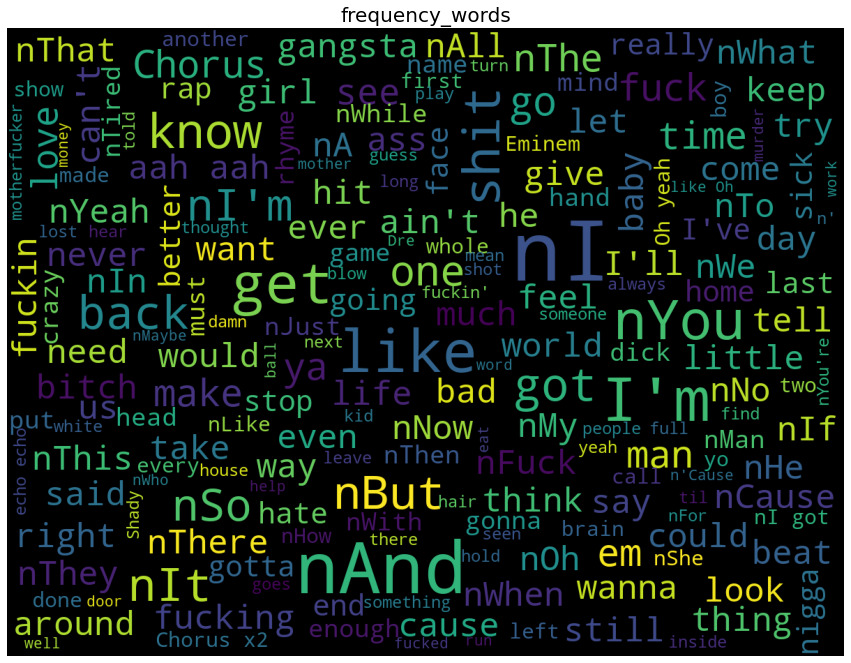

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud=WordCloud(width=400,height=300,max_words = 200,
                     stopwords = stopwords,
                     background_color='black',max_font_size = 40,
                     scale = 3).generate(str(song_data))


fig = plt.figure(figsize=(15,15))
plt.axis('off')

fig.subplots_adjust(top = 2.25)
plt.imshow(wordcloud)
plt.title('frequency_words',size=20)
plt.show()



In [ ]:
song_data[:2]

["Too late for the other side  \nCaught in a chase  \nTwenty five to life  \nToo late for the other side  \nCaught in a chase  \nTwenty five to life  \nYeah  \nToo late  \nI cant keep chasing 'em  \nI'm taking my life back  \nCaught in a change  \nTwenty five to life  \n  \nI don't think she understands the sacrifices that I've made  \nMaybe if this bitch had acted right I would've stayed  \nBut I've already wasted over half of my life I would've laid  \nDown and died for you I no longer cried for you  \nNo more pain bitch you  \nTook me for granted took my heart and ran it straight into the planet  \nInto the dirt I can no longer stand it  \nNow my respect I demand it  \nI'm a take control of this relationship  \nCommand it, and I'm a be the boss of you now goddammit  \nAnd what I mean is that I will no longer let you control me  \nSo you better hear me out this much you owe me  \nI gave up my life for you, totally devoted to you while I've stayed  \nFaithful all the way this is how I

In [ ]:
song_data_arr=[song.split('\n') for song in song_data]

In [ ]:
song_data_arr[:2]

[['Too late for the other side  ',
  'Caught in a chase  ',
  'Twenty five to life  ',
  'Too late for the other side  ',
  'Caught in a chase  ',
  'Twenty five to life  ',
  'Yeah  ',
  'Too late  ',
  "I cant keep chasing 'em  ",
  "I'm taking my life back  ",
  'Caught in a change  ',
  'Twenty five to life  ',
  '  ',
  "I don't think she understands the sacrifices that I've made  ",
  "Maybe if this bitch had acted right I would've stayed  ",
  "But I've already wasted over half of my life I would've laid  ",
  'Down and died for you I no longer cried for you  ',
  'No more pain bitch you  ',
  'Took me for granted took my heart and ran it straight into the planet  ',
  'Into the dirt I can no longer stand it  ',
  'Now my respect I demand it  ',
  "I'm a take control of this relationship  ",
  "Command it, and I'm a be the boss of you now goddammit  ",
  'And what I mean is that I will no longer let you control me  ',
  'So you better hear me out this much you owe me  ',
  "I ga

In [ ]:
import re

def clean_text(text):
  x=re.sub('  ',' ',text)
  x=re.sub(r' $','',x)
  x=' '.join([i for i in text.split() if i not in stopwords])
  return x

In [ ]:
x_song_data=[[clean_text(text) for text in i if text != '']for i in song_data_arr]
x_song_data[:2]

[['Too late side',
  'Caught chase',
  'Twenty five life',
  'Too late side',
  'Caught chase',
  'Twenty five life',
  'Yeah',
  'Too late',
  "I cant keep chasing 'em",
  "I'm taking life back",
  'Caught change',
  'Twenty five life',
  '',
  "I think understands sacrifices I've made",
  "Maybe bitch acted right I would've stayed",
  "But I've already wasted half life I would've laid",
  'Down died I longer cried',
  'No pain bitch',
  'Took granted took heart ran straight planet',
  'Into dirt I longer stand',
  'Now respect I demand',
  "I'm take control relationship",
  "Command it, I'm boss goddammit",
  'And I mean I longer let control',
  'So better hear much owe',
  "I gave life you, totally devoted I've stayed",
  'Faithful way I fucking get repaid',
  'Look I dress fucking baggy sweats, go work mess',
  "Always rush get back I ain't heard yet",
  'Not even say appreciate I deserve respect',
  "I've done best give nothing less perfectness",
  "And I know I end I'll longer no

In [ ]:
from collections import defaultdict

word_count=defaultdict(int)

for x_data in x_song_data:
  for line in x_data:
    for j in line.split():
       word_count[j]+=1

In [ ]:
len(word_count)

7314

In [ ]:
sorted(word_count,key=word_count.get,reverse=True)[:10]

['I', "I'm", 'And', 'like', 'You', 'get', 'But', 'got', 'know', 'shit']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer=Tokenizer()

In [ ]:
x_song_data=[i for x in x_song_data for i in x]

In [ ]:
new_song_data=[]
for i in x_song_data:
  if i not in new_song_data: 
    new_song_data.append(i)

In [ ]:
len(x_song_data),len(new_song_data)

(5089, 4167)

In [ ]:
input_sequences=[]
for line in new_song_data:
    token_list=tokenizer.texts_to_sequences([line])[0]
    for i in range(1,len(token_list)):
      tokens=token_list[:i+1]
      input_sequences.append(tokens)
      


In [ ]:
"""tokenizer.fit_on_texts([['Too late side','Caught chase', 'Twenty five life', 'Too late side', 'Caught chase'],['Twenty five life', 'Yeah', 'Too late', 'I cant keep chasing em']])
token_list=tokenizer.texts_to_sequences([['Too late side','Caught chase', 'Twenty five life', 'Too late side', 'Caught chase'],['Twenty five life', 'Yeah', 'Too late', 'I cant keep chasing em']])
token_list"""

"tokenizer.fit_on_texts([['Too late side','Caught chase', 'Twenty five life', 'Too late side', 'Caught chase'],['Twenty five life', 'Yeah', 'Too late', 'I cant keep chasing em']])\ntoken_list=tokenizer.texts_to_sequences([['Too late side','Caught chase', 'Twenty five life', 'Too late side', 'Caught chase'],['Twenty five life', 'Yeah', 'Too late', 'I cant keep chasing em']])\ntoken_list"

In [ ]:
[i for i in input_sequences if len(i)==14]

[[1, 10, 284, 871, 1, 10, 416, 541, 520, 1216, 27, 1536, 286, 621],
 [375, 46, 851, 1998, 375, 46, 851, 1998, 421, 421, 421, 965, 766, 39]]

In [ ]:
len(input_sequences)

17420

In [ ]:
max([len(x) for x in input_sequences])

14

In [ ]:
tokenizer.fit_on_texts(new_song_data)
vocab=tokenizer.word_index


In [ ]:
#padding
sequence=pad_sequences(input_sequences,maxlen=14,padding='pre')
sequence[:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 481,
        422],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 481, 422,
        289]], dtype=int32)

In [ ]:
x_data,labels=sequence[:,:-1],sequence[:,-1]

In [ ]:
len(vocab)

5326

In [ ]:
labels

array([422, 289, 779, ..., 182, 385, 250], dtype=int32)

In [ ]:
from tensorflow.keras.utils import to_categorical
labels=to_categorical(labels,num_classes=len(vocab)+1)

In [ ]:
from tensorflow.keras.layers import Input,Dense,Dropout,LSTM,Embedding,Flatten,GlobalMaxPooling1D
from tensorflow.keras.models import Model

In [ ]:
x_data.shape,labels.shape

((17420, 13), (17420, 5327))

# Using transformer architecture 

In [ ]:
from tensorflow.keras import layers

In [ ]:
"""class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)  
        key = self.key_dense(inputs)  
        value = self.value_dense(inputs)  
        query = self.separate_heads(
            query, batch_size
        )  
        key = self.separate_heads(
            key, batch_size
        )  
        value = self.separate_heads(
            value, batch_size
        )  
        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(
            attention, perm=[0, 2, 1, 3]
        )  
        concat_attention = tf.reshape(
            attention, (batch_size, -1, self.embed_dim)
        )  
        output = self.combine_heads(
            concat_attention
        )  
        return output"""

'class MultiHeadSelfAttention(layers.Layer):\n    def __init__(self, embed_dim, num_heads):\n        super(MultiHeadSelfAttention, self).__init__()\n        self.embed_dim = embed_dim\n        self.num_heads = num_heads\n        if embed_dim % num_heads != 0:\n            raise ValueError(\n                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"\n            )\n        self.projection_dim = embed_dim // num_heads\n        self.query_dense = layers.Dense(embed_dim)\n        self.key_dense = layers.Dense(embed_dim)\n        self.value_dense = layers.Dense(embed_dim)\n        self.combine_heads = layers.Dense(embed_dim)\n\n    def attention(self, query, key, value):\n        score = tf.matmul(query, key, transpose_b=True)\n        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)\n        scaled_score = score / tf.math.sqrt(dim_key)\n        weights = tf.nn.softmax(scaled_score, axis=-1)\n        output = tf.matmul(weights, value)\n        

In [ ]:
"""class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)"""

'class TransformerBlock(layers.Layer):\n    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):\n        super(TransformerBlock, self).__init__()\n        self.att = MultiHeadSelfAttention(embed_dim, num_heads)\n        self.ffn = tf.keras.Sequential(\n            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]\n        )\n        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)\n        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)\n        self.dropout1 = layers.Dropout(rate)\n        self.dropout2 = layers.Dropout(rate)\n\n    def call(self, inputs, training):\n        attn_output = self.att(inputs)\n        attn_output = self.dropout1(attn_output, training=training)\n        out1 = self.layernorm1(inputs + attn_output)\n        ffn_output = self.ffn(out1)\n        ffn_output = self.dropout2(ffn_output, training=training)\n        return self.layernorm2(out1 + ffn_output)'

In [ ]:
#model development
#num_heads=4
embedding_dim=100
i=Input(shape=(x_data.shape[1],))
x=Embedding(len(vocab)+1,embedding_dim)(i)
#x=TransformerBlock(embedding_dim, num_heads,512)(x)
x=LSTM(512,return_sequences=True)(x)
x=Dropout(0.2)(x)
x=Dense(256,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(len(vocab)+1,activation='softmax')(x)

model=Model(i,x)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 13, 100)           532700    
_________________________________________________________________
lstm (LSTM)                  (None, 13, 512)           1255424   
_________________________________________________________________
dropout (Dropout)            (None, 13, 512)           0         
_________________________________________________________________
dense (Dense)                (None, 13, 256)           131328    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 5327)             

In [ ]:
type(model)

tensorflow.python.keras.engine.functional.Functional

In [ ]:
!pip install h5py pyyaml

# Training

In [ ]:
checkpoint_filepath='/content/EminemRAPGmodel.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)

r=model.fit(x_data,labels,epochs=30,callbacks=[model_checkpoint_callback])

Epoch 1/30
157/157 [==============================] - 30s 192ms/step - loss: 7.9036 - accuracy: 0.0450
Epoch 2/30
157/157 [==============================] - 34s 217ms/step - loss: 7.1899 - accuracy: 0.0484
Epoch 3/30
157/157 [==============================] - 30s 193ms/step - loss: 7.0758 - accuracy: 0.0484
Epoch 4/30
157/157 [==============================] - 32s 205ms/step - loss: 6.9845 - accuracy: 0.0486
Epoch 5/30
157/157 [==============================] - 30s 192ms/step - loss: 6.8155 - accuracy: 0.0498
Epoch 6/30
157/157 [==============================] - 30s 194ms/step - loss: 6.5362 - accuracy: 0.0510
Epoch 7/30
157/157 [==============================] - 30s 192ms/step - loss: 6.2447 - accuracy: 0.0556
Epoch 8/30
157/157 [==============================] - 30s 191ms/step - loss: 5.9143 - accuracy: 0.0592
Epoch 9/30
157/157 [==============================] - 31s 199ms/step - loss: 5.5317 - accuracy: 0.0688
Epoch 10/30
157/157 [==============================] - 30s 193ms/step - l

# Predictions

In [ ]:
import pickle
def save_obj(obj, name ):
    with open('/content/'+ name + '.pkl', 'wb') as f:
         pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
save_obj(tokenizer,'tokenizer')

In [ ]:
new_song_data[:10]

['Too late side',
 'Caught chase',
 'Twenty five life',
 'Yeah',
 'Too late',
 "I cant keep chasing 'em",
 "I'm taking life back",
 'Caught change',
 '',
 "I think understands sacrifices I've made"]

In [ ]:
#predictions
seed_text = "Too late"
next_words = 100


for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=13, padding='pre')
	predicted = model.predict(token_list, verbose=0).argmax(axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Too late side i'm five chance chance brothers brothers i got i i shit i fucking fucking i i want one shit say i i i shit i i'll i water trick know i shit shit i go i shit i i i skin shit shit fuckin' i'll go one go say i shit i i 'em i'll shit water i i i come i fucked shit up water i'll i i skin i i up i i shit shit skin skin skin skin skin skin skin skin skin skin skin forehead forehead kilts kilts kilts kilts kilts kilts kilts kilts kilts
